In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
from sklearn.pipeline import Pipeline

In [32]:
df=pd.read_csv(r'..\Data\Housing.csv')

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
new_df=df.copy()

In [17]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
df.shape

(545, 13)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [20]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [21]:
print(df['mainroad'].value_counts(),df['mainroad'].value_counts(normalize=True).values)

mainroad
yes    468
no      77
Name: count, dtype: int64 [0.8587156 0.1412844]


In [33]:
def obj_n_unique(DataFrame):
    obj_cols = DataFrame.select_dtypes(include='object').columns
    print(f"{'Column Name':<20}{'No.of Unique':<15}{'Unique Values'}")
    print("-" * 60)
    
    for col in obj_cols:
        nunique = DataFrame[col].nunique()
        uniques = DataFrame[col].unique()
        print(f"{col:<20}{nunique:<15}{uniques}")

obj_n_unique(df)

Column Name         No.of Unique   Unique Values
------------------------------------------------------------
mainroad            2              ['yes' 'no']
guestroom           2              ['no' 'yes']
basement            2              ['no' 'yes']
hotwaterheating     2              ['no' 'yes']
airconditioning     2              ['yes' 'no']
prefarea            2              ['yes' 'no']
furnishingstatus    3              ['furnished' 'semi-furnished' 'unfurnished']


In [23]:
def padded_value_counts(df, col):
    counts = df[col].value_counts()
    norm = df[col].value_counts(normalize=True)

    print(f"{'Value':<15}{'Count':<10}{'Proportion':<10}")
    print("-" * 40)
    
    for val, cnt in counts.items():
        prop = norm[val]
        print(f"{str(val):<15}{cnt:<10}{prop:<10.4f}")

padded_value_counts(df,col='mainroad')

Value          Count     Proportion
----------------------------------------
yes            468       0.8587    
no             77        0.1413    


In [35]:
def Manual_Encoding(df,cols:list):
    new_df=df.copy()
    if len(cols)==1:
        col=cols[0]
        new_df[col]=new_df[col].map({'yes':1,'no':0})
    else:
        for col in cols:
            new_df[col]=new_df[col].map({'yes':1,'no':0})
    return new_df


In [38]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [37]:
df=Manual_Encoding(df,['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'])

In [39]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [40]:
Or_Encoder=OrdinalEncoder(categories=[['furnished','semi-furnished','unfurnished']])

df['furnishingstatus']=Or_Encoder.fit_transform(df[['furnishingstatus']])

In [41]:
df['furnishingstatus']=df['furnishingstatus'].astype(np.int64)

In [42]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

<Axes: xlabel='None', ylabel='area'>

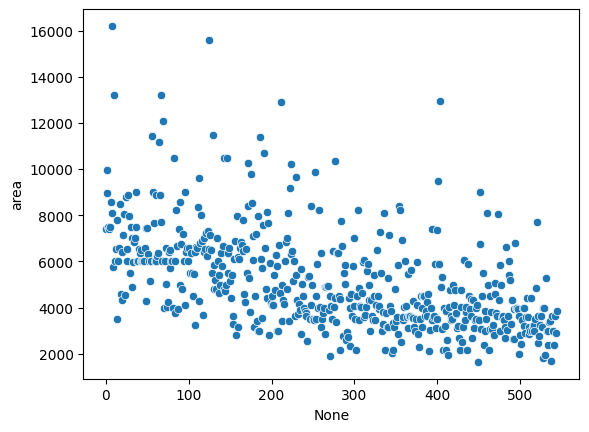

In [20]:
sns.scatterplot(data=df,x=df.index,y='area')

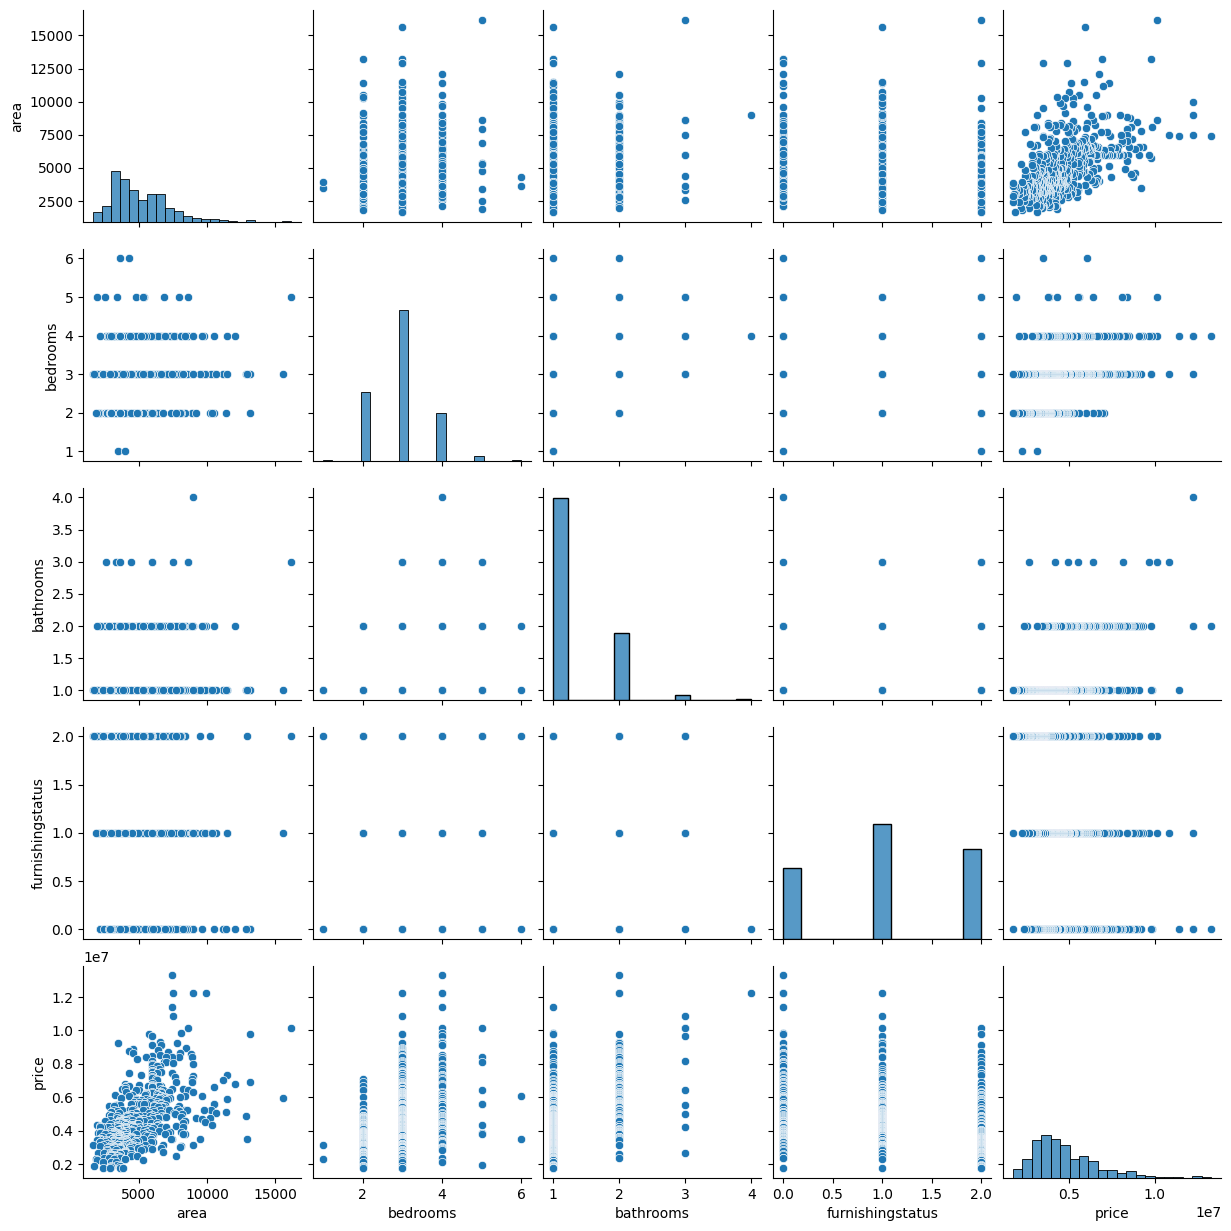

In [131]:
sns.pairplot(df[['area','bedrooms','bathrooms','furnishingstatus','price']])

In [21]:
df['price'].max()-df['price'].min()

np.int64(11550000)

In [22]:
df[['area','bedrooms','bathrooms','furnishingstatus','price']].corr()

,area,bedrooms,bathrooms,furnishingstatus,price
area,1.000000,0.151858,0.193820,-0.171445,0.535997
bedrooms,0.151858,1.000000,0.373930,-0.123244,0.366494
bathrooms,0.193820,0.373930,1.000000,-0.143559,0.517545
furnishingstatus,-0.171445,-0.123244,-0.143559,1.000000,-0.304721
price,0.535997,0.366494,0.517545,-0.304721,1.000000


<Axes: xlabel='area', ylabel='Density'>

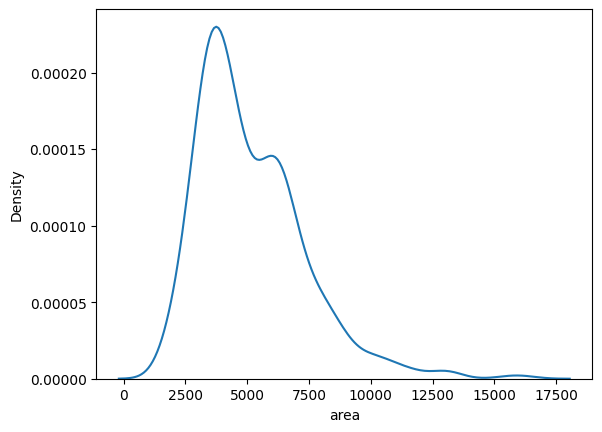

In [138]:
sns.kdeplot(df['area'])

<Axes: xlabel='price', ylabel='Density'>

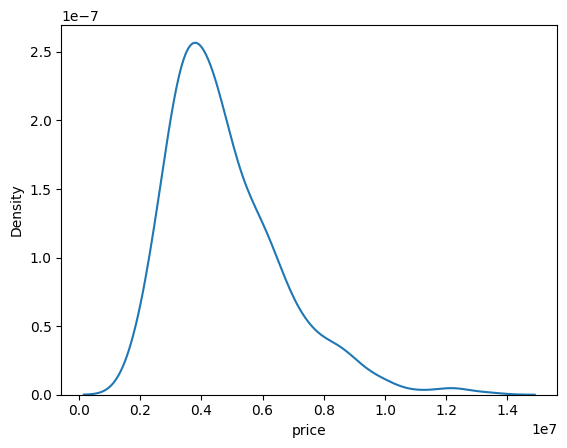

In [136]:
sns.kdeplot(df['price'])

In [24]:
df['area'].corr(df['price'])

np.float64(0.5359973457780796)

<Axes: xlabel='area', ylabel='price'>

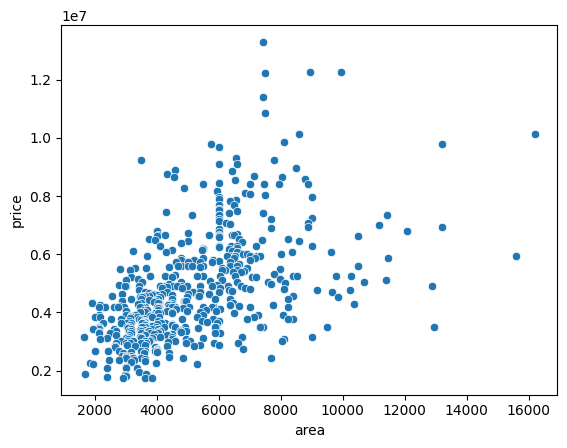

In [95]:
sns.scatterplot(data=df,x='area',y='price')

<Axes: xlabel='area'>

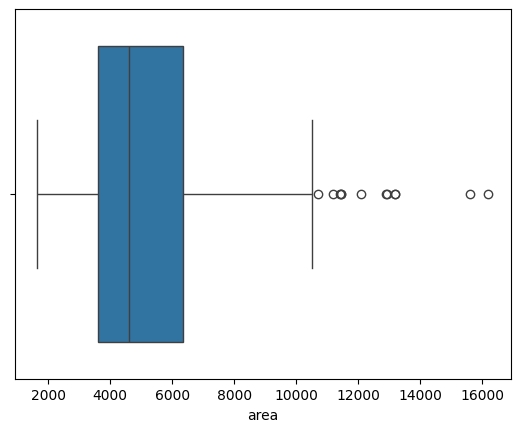

In [51]:
sns.boxplot(data=df,x='area')

In [43]:
def find_iqr(df,col):
    Q1=np.percentile(df[col],25)
    Q3=np.percentile(df[col],75)

    IQR=Q3-Q1

    LowerLimit=Q1-1.5*IQR
    UpperLimit=Q3+1.5*IQR

    return {'IQ':IQR,'LowerLimit':LowerLimit,'UpperLimit':UpperLimit}

iqr_price=find_iqr(df,'area')

In [44]:
iqr_price

{'IQ': np.float64(2760.0),
 'LowerLimit': np.float64(-540.0),
 'UpperLimit': np.float64(10500.0)}

In [45]:
df.shape

(545, 13)

In [46]:
df[(df['area']>iqr_price['UpperLimit']) | (df['area']<iqr_price['LowerLimit'])]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,0
56,7343000,11440,4,1,2,1,0,1,0,0,1,1,1
64,7000000,11175,3,1,1,1,0,1,0,1,1,1,0
66,6930000,13200,2,1,1,1,0,1,1,0,1,0,0
69,6790000,12090,4,2,2,1,0,0,0,0,2,1,0
125,5943000,15600,3,1,1,1,0,0,0,1,2,0,1
129,5873000,11460,3,1,3,1,0,0,0,0,2,1,1
186,5110000,11410,2,1,2,1,0,0,0,0,0,1,0
191,5040000,10700,3,1,2,1,1,1,0,0,0,0,1


In [47]:
new_df['area']=df['area'].clip(iqr_price['LowerLimit'],iqr_price['UpperLimit'])

<Axes: xlabel='area', ylabel='price'>

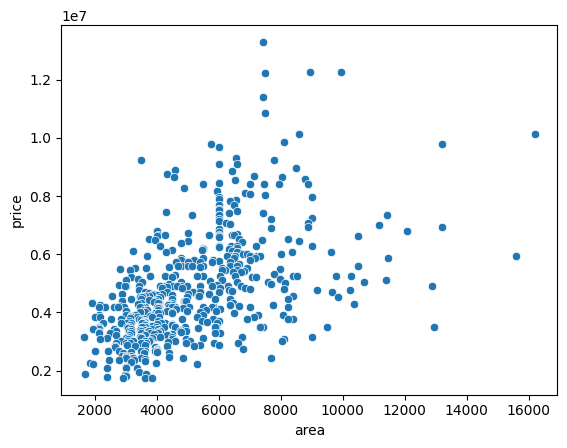

In [28]:
sns.scatterplot(data=df,x='area',y='price')

In [48]:
new_df['price_log']=np.log1p(df['price'])

In [49]:
new_df['price_log']

0      16.403275
1      16.321037
2      16.321037
3      16.318175
4      16.250001
         ...    
540    14.414348
541    14.384879
542    14.375127
543    14.375127
544    14.375127
Name: price_log, Length: 545, dtype: float64

In [32]:
new_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_log
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321037
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321037
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,14.414348
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,14.384879
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,14.375127
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,14.375127


<Axes: ylabel='area'>

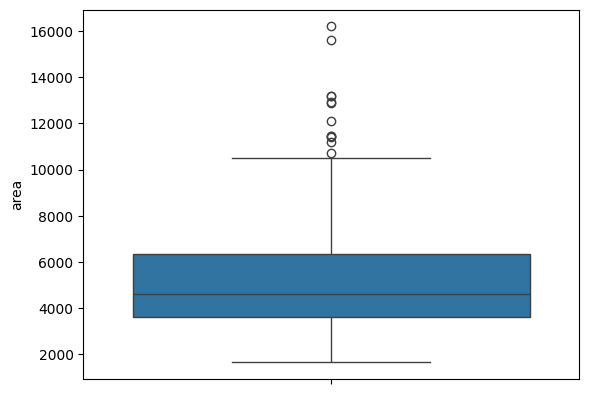

In [50]:
sns.boxplot(df['area'])

In [51]:
area_iqr=find_iqr(new_df,'area')

In [52]:
Scaler=StandardScaler()


new_df['Scaled_area']=Scaler.fit_transform(df[['area']])

In [53]:
new_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_log,Scaled_area
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275,1.046726
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321037,1.757010
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321037,2.218232
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175,1.083624
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001,1.046726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,14.414348,-0.991879
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,14.384879,-1.268613
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,14.375127,-0.705921
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,14.375127,-1.033389


In [54]:
new_df2=pd.get_dummies(new_df,dtype=np.int64,drop_first=True)

<Axes: xlabel='Scaled_area', ylabel='price_log'>

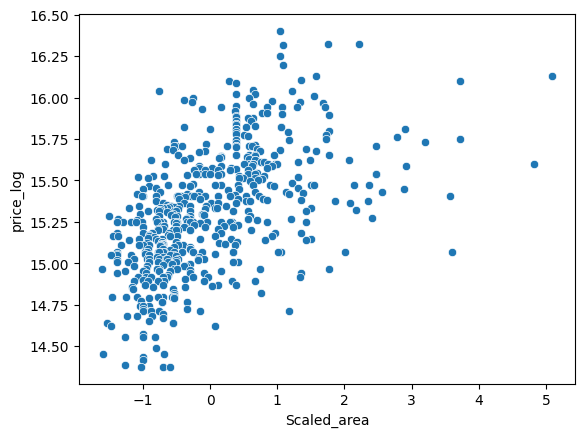

In [55]:
sns.scatterplot(data=new_df,x='Scaled_area',y='price_log')

<Axes: xlabel='area', ylabel='price'>

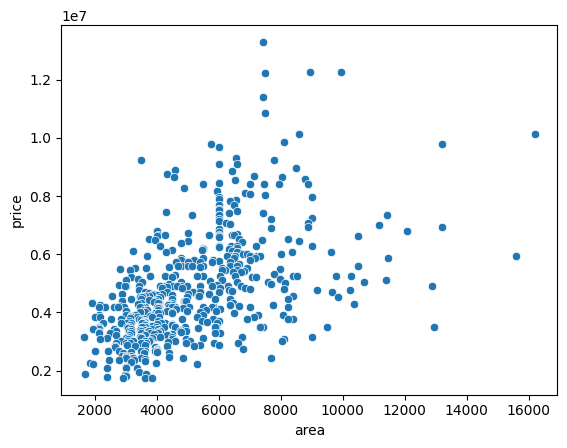

In [56]:
sns.scatterplot(data=df,x='area',y='price')

In [57]:
area_iqr.items()

dict_items([('IQ', np.float64(2760.0)), ('LowerLimit', np.float64(-540.0)), ('UpperLimit', np.float64(10500.0))])

In [58]:
df[(df['area']>iqr_price['UpperLimit']) | (df['area']<iqr_price['LowerLimit'])]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,0
56,7343000,11440,4,1,2,1,0,1,0,0,1,1,1
64,7000000,11175,3,1,1,1,0,1,0,1,1,1,0
66,6930000,13200,2,1,1,1,0,1,1,0,1,0,0
69,6790000,12090,4,2,2,1,0,0,0,0,2,1,0
125,5943000,15600,3,1,1,1,0,0,0,1,2,0,1
129,5873000,11460,3,1,3,1,0,0,0,0,2,1,1
186,5110000,11410,2,1,2,1,0,0,0,0,0,1,0
191,5040000,10700,3,1,2,1,1,1,0,0,0,0,1


In [59]:
new_df['clipped_area']=df['area'].clip(lower=iqr_price['LowerLimit'],upper=iqr_price['UpperLimit'])

In [60]:
new_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_log,Scaled_area,clipped_area
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275,1.046726,7420
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321037,1.757010,8960
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321037,2.218232,9960
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175,1.083624,7500
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001,1.046726,7420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,14.414348,-0.991879,3000
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,14.384879,-1.268613,2400
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,14.375127,-0.705921,3620
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,14.375127,-1.033389,2910


In [61]:
new_df2.drop('price',axis=1,inplace=True)

In [62]:
X=new_df2.drop('price_log',axis=1)
y=new_df2['price_log']

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
model=LinearRegression()


model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [65]:
y_pred=model.predict(X_test)

y_pred

array([15.33217479, 15.78715234, 15.00958431, 15.31783199, 15.02673564,
       15.06075279, 15.48875007, 15.64160027, 14.83297205, 14.85144848,
       16.25506275, 14.89464757, 14.92920236, 15.05274904, 15.09835474,
       15.29554613, 14.9850806 , 15.29518285, 15.23082689, 15.11134362,
       15.4952853 , 15.6025309 , 14.87985093, 15.29678507, 15.4531871 ,
       15.89870082, 14.99915599, 15.39379144, 15.94842932, 15.03684174,
       15.67507262, 14.99012326, 15.68752277, 15.24614386, 15.06264292,
       15.51909191, 15.36197709, 15.23433687, 14.93820368, 15.25586732,
       15.30533549, 15.03440021, 15.7829989 , 15.15547128, 15.15028213,
       15.18634161, 15.71972889, 15.19993371, 15.1083421 , 15.01485617,
       15.75660709, 14.88102243, 15.23794791, 15.28096997, 15.10268343,
       14.86235126, 15.80457235, 14.917876  , 15.25903903, 14.88769055,
       15.32079569, 14.9814081 , 15.39432212, 15.20241862, 15.26431623,
       15.29953435, 15.79572327, 15.04799427, 15.51826262, 15.61

In [66]:
r2_score(y_test,y_pred)

0.6719964470069937

In [67]:
from sklearn.model_selection import cross_val_score


scores=cross_val_score(model,X_train,y_train,cv=5,scoring='r2')

scores

array([0.70033166, 0.68752685, 0.67026705, 0.68829691, 0.63874468])